In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime, date, time

In [49]:
df = pd.read_csv('HRDataset.csv')

In [50]:
df_grouped=df.groupby(['ManagerID'])['PerformanceScore'].size()

In [51]:
df_grouped=df_grouped.to_frame()
df_grouped=df_grouped[(df_grouped['PerformanceScore'] > 10 )]
df_grouped_2=df.groupby(['ManagerID','PerformanceScore']).size()
df_grouped_2=df_grouped_2.to_frame()

In [52]:
df_joined=df_grouped_2.join(df_grouped,on="ManagerID")
df_joined=df_joined.dropna()
df_joined=df_joined.drop(columns=['PerformanceScore'])
df_joined.groupby(['ManagerID'])
df_joined = df_joined.reset_index()
df_pip = df_joined[df_joined["PerformanceScore"].str.contains("PIP") == True]
df_exceeds = df_joined[df_joined["PerformanceScore"].str.contains("Exceeds") == True]
df_need = df_joined[df_joined["PerformanceScore"].str.contains("Needs Improvement") == True]
df_fully = df_joined[df_joined["PerformanceScore"].str.contains("Fully Meets") == True]

In [53]:
df_pip=df_pip.rename(columns={0 :'Count'})
num_pip=df_pip['Count'].to_numpy()
num_pip_2=df_pip['ManagerID'].to_numpy()
df_need=df_need.rename(columns={0 : 'Count'})
num_need=df_need['Count'].to_numpy()
num_need_2=df_need['ManagerID'].to_numpy()

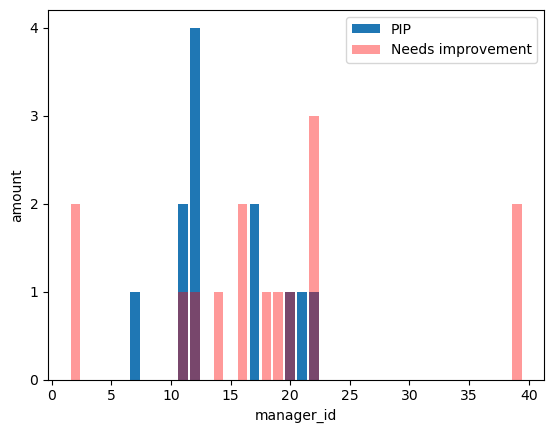

In [54]:
fig, ax = plt.subplots()
ax.bar(num_pip_2,num_pip)
ax.bar(num_need_2,num_need,alpha=0.4,color='r')
ax.set_xlabel("manager_id")
ax.set_ylabel("amount")
ax.legend(["PIP", "Needs improvement"])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [55]:
df_exceeds=df_exceeds.rename(columns={0 :'Count'})
num_exceeds=df_exceeds['Count'].to_numpy()
num_exceeds_2=df_exceeds['ManagerID'].to_numpy()
df_fully=df_fully.rename(columns={0 : 'Count'})
num_fully=df_fully['Count'].to_numpy()
num_fully_2=df_fully['ManagerID'].to_numpy()

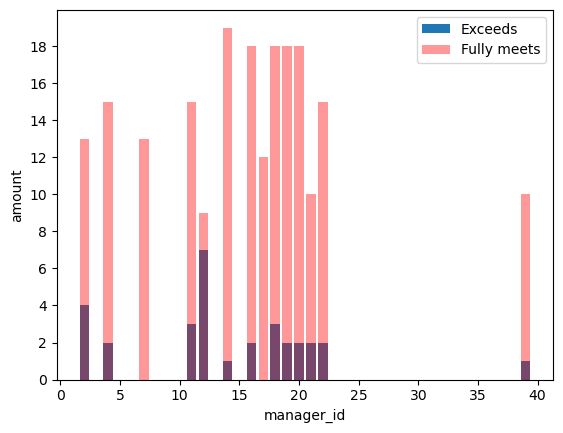

In [56]:
fig, ax = plt.subplots()
ax.bar(num_exceeds_2,num_exceeds)
ax.bar(num_fully_2,num_fully,alpha=0.4,color='r')
ax.set_xlabel("manager_id")
ax.set_ylabel("amount")
ax.legend(["Exceeds", "Fully meets"])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Manager with ID 12 seems to be tretty critical. He gives a higher numer of critical reports and a smaller number of positive ones. Everything else seems to be quite ordinary.

In [57]:
df[['DateofHire','DateofTermination']] = df[['DateofHire','DateofTermination']].apply(pd.to_datetime) 
df['days'] = (df['DateofTermination'] - df['DateofHire']).dt.days
df=df.dropna(subset=['days'])

C:\Users\Damian\AppData\Local\Temp\ipykernel_9388\2558384187.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['DateofHire','DateofTermination']] = df[['DateofHire','DateofTermination']].apply(pd.to_datetime)


In [58]:
f"{df.groupby(['RecruitmentSource']).size().idxmax()} {df.groupby(['RecruitmentSource'])['days'].sum().max()}"

'Diversity Job Fair 13845.0'

The best type to keep the employees is Diversity Job Fair.

In [59]:
df_new = pd.read_csv('HRDataset.csv')
df_satisfied=df_new[['EmpSatisfaction','MaritalDesc']]
df_satisfied.groupby(["EmpSatisfaction","MaritalDesc"]).size()

EmpSatisfaction  MaritalDesc
1.0              Separated       1
                 Single          1
2.0              Divorced        1
                 Married         5
                 Single          3
3.0              Divorced        6
                 Married        54
                 Separated       4
                 Single         44
4.0              Divorced       14
                 Married        31
                 Separated       2
                 Single         40
                 Widowed         6
5.0              Divorced        9
                 Married        33
                 Separated       5
                 Single         49
                 Widowed         2
dtype: int64

There seems to be a small correlation between being a single and being quite satisfied with the job in contrast to being married. Singles are more likely to provide higher satisfaction scores according to the data.

In [60]:
df_new[['DOB']] = df_new[['DOB']].apply(pd.to_datetime) 
date = date(2019,12,31)
set_time = time(10, 12, 30)
date_time = datetime.combine(date,set_time)
df_new['years'] = (date_time - df_new['DOB']).dt.days
df_new=df_new.dropna(subset=['years'])
df_new['years']=df_new['years']/365
df_new_years=df_new['years']
df_new_years=df_new_years.to_numpy()
df_new_years_2=df_new['years']
df_new_years_2=df_new_years_2.to_frame()
df_new_years_2['years'] = df_new_years_2.apply(lambda row: row+100 if int(row.iloc[0])<0  else row,axis=1)


C:\Users\Damian\AppData\Local\Temp\ipykernel_9388\514591313.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new[['DOB']] = df_new[['DOB']].apply(pd.to_datetime)


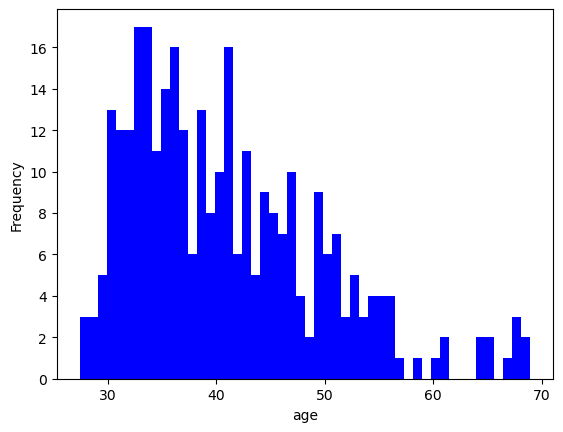

In [61]:
df_new_years_2['years'].plot(kind='hist',bins=50,color='b',xlabel="age").locator_params(axis='y', integer=True)

Most of th employees are between 30 and about 40 years old.

Text(0, 0.5, 'amount of special projects')

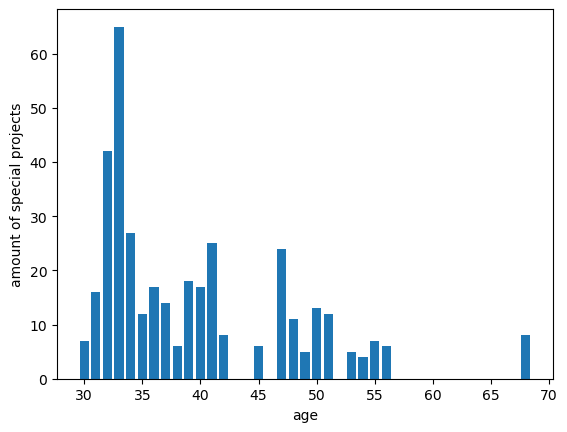

In [62]:
df_new['years'] = df_new['years'].apply(lambda row: round(row+100,0) if row<0  else round(row,0))
df_new=df_new.groupby(['years','SpecialProjectsCount']).size()
df_new=df_new.to_frame()
df_new = df_new.reset_index()
df_new = df_new.drop(df_new[df_new['SpecialProjectsCount'] == 0.0].index)
df_new=df_new.rename( columns={0 :'Amount'})
df_new['total'] = df_new['SpecialProjectsCount'] * df_new['Amount']
df_new=df_new.groupby(['years'])['total'].sum()
df_new=df_new.to_frame()
df_new = df_new.reset_index()
df_years=df_new['years']
df_years=df_years.to_numpy()
df_total=df_new['total']
df_total=df_total.to_numpy()
fig, ax = plt.subplots()
ax.bar(df_years,df_total)
ax.set_xlabel("age")
ax.set_ylabel("amount of special projects")

The younger employees have a higher number of special projects.